#**Random Forest**
>1. Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile('glass.xlsx')
print("Sheet name:", xls.sheet_names)

Sheet name: ['Description', 'glass']


In [3]:
df = pd.read_excel(xls, 'glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

>2: Data Visualization:

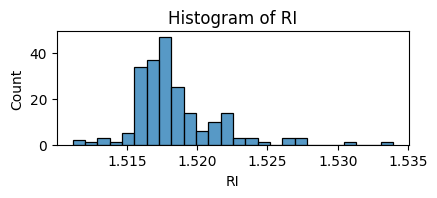

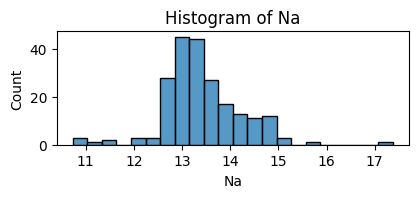

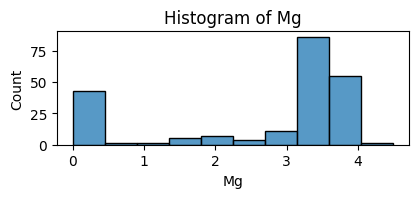

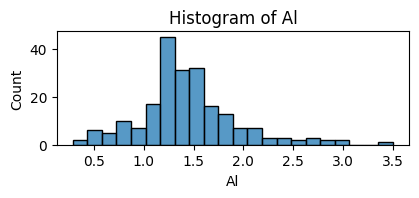

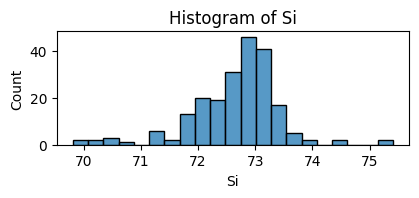

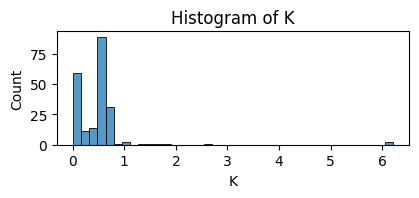

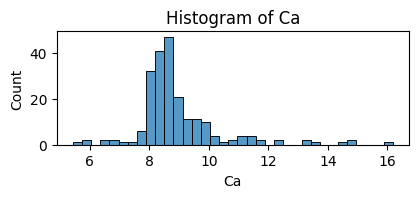

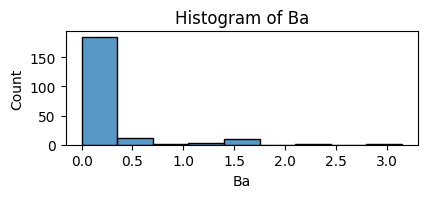

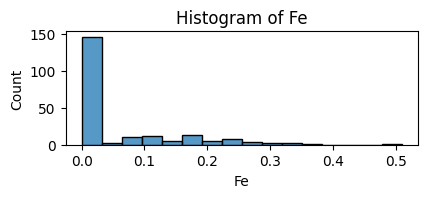

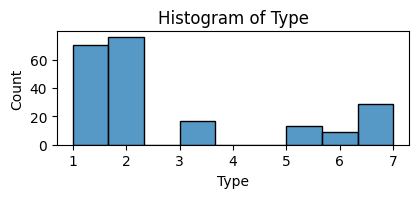

In [8]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  plt.subplot(3,2,1)
  plt.title(f"Histogram of {col}")
  sns.histplot(df[col])
  plt.show()

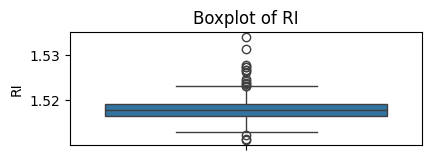

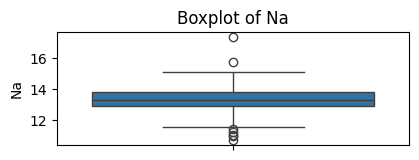

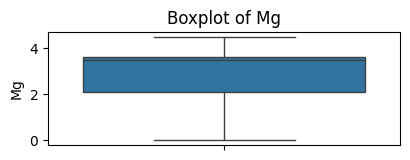

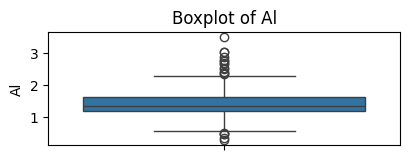

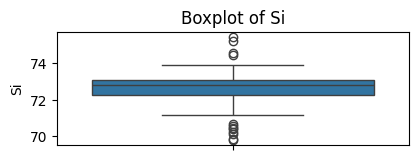

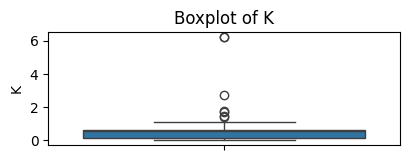

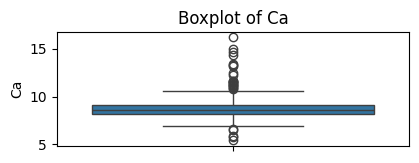

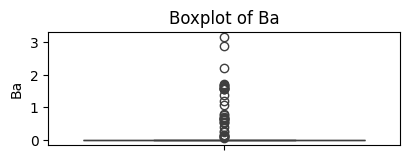

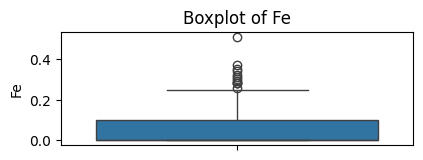

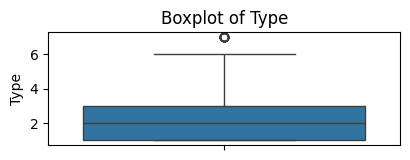

In [9]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  plt.subplot(3,2,1)
  plt.title(f"Boxplot of {col}")
  sns.boxplot(df[col])
  plt.show()

In [10]:
# Outlier Treatment using IQR

for col in df:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("\nData cleaning completed!")


Data cleaning completed!


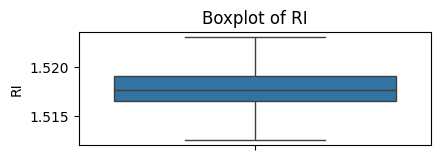

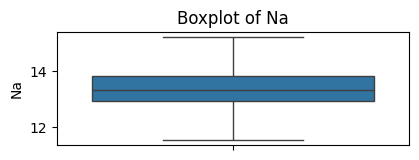

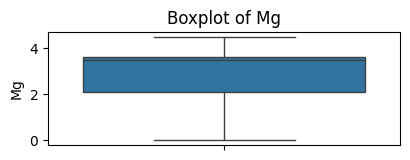

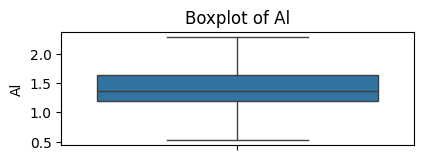

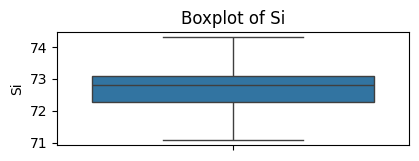

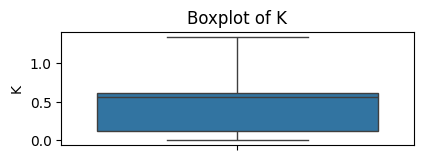

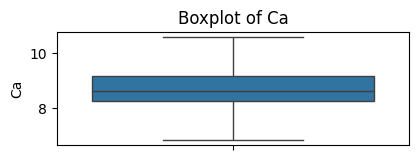

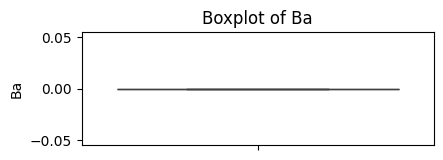

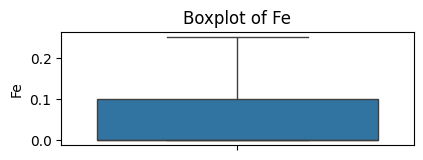

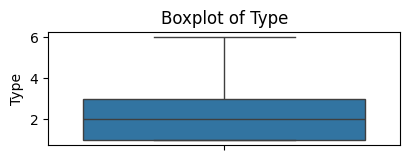

In [11]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  plt.subplot(3,2,1)
  plt.title(f"Boxplot of {col}")
  sns.boxplot(df[col])
  plt.show()

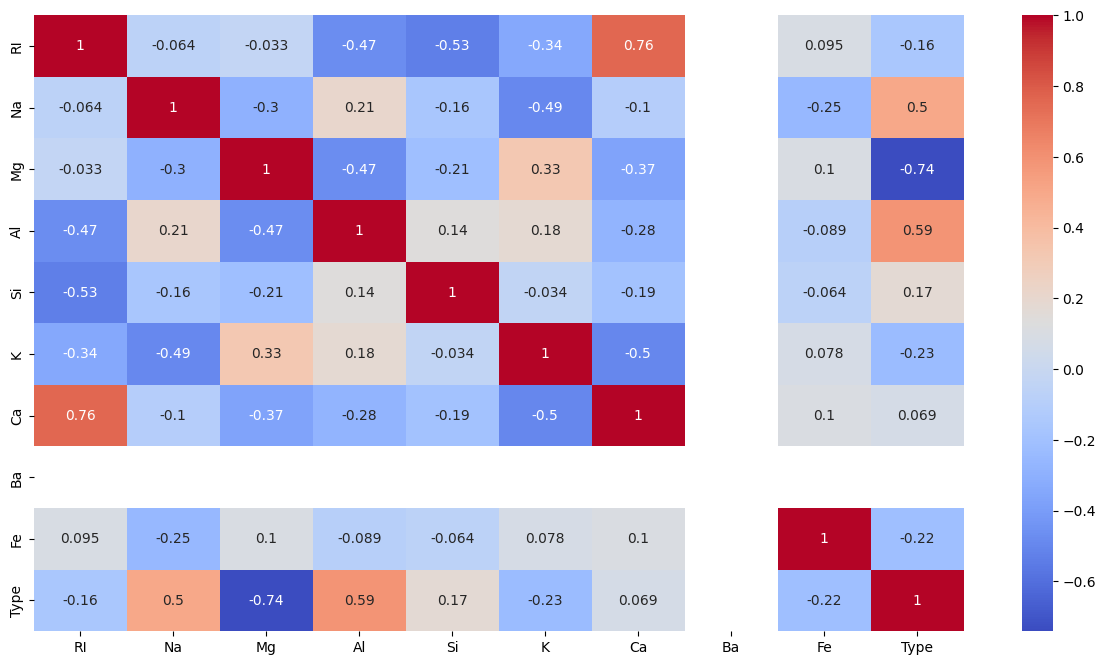

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

>3: Data Preprocessing

In [13]:
# Checking for missing values.
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [14]:
# Checking for categorical columns
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [15]:
X = df.drop('Type', axis=1)
y = df['Type']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091


>4: Random Forest Model Implementation

In [17]:
# Dividing the data into train and test split.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171,)
(43,)


In [21]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=42)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.782034632034632


In [23]:
# Train on the training set
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [25]:
# Predict labels
y_pred = model.predict(X_test)
y_pred

array([1., 6., 1., 6., 2., 2., 1., 2., 2., 1., 6., 2., 1., 2., 6., 5., 6.,
       1., 1., 6., 2., 6., 6., 6., 3., 2., 1., 1., 2., 1., 1., 2., 3., 2.,
       1., 6., 5., 1., 1., 6., 1., 6., 1.])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.813953488372093
Precision: 0.839543692741367
Recall: 0.813953488372093
F1-score: 0.8053806688387073

Classification Report:
               precision    recall  f1-score   support

         1.0       0.69      1.00      0.81        11
         2.0       0.82      0.64      0.72        14
         3.0       1.00      0.67      0.80         3
         5.0       1.00      0.50      0.67         4
         6.0       0.92      1.00      0.96        11

    accuracy                           0.81        43
   macro avg       0.88      0.76      0.79        43
weighted avg       0.84      0.81      0.81        43



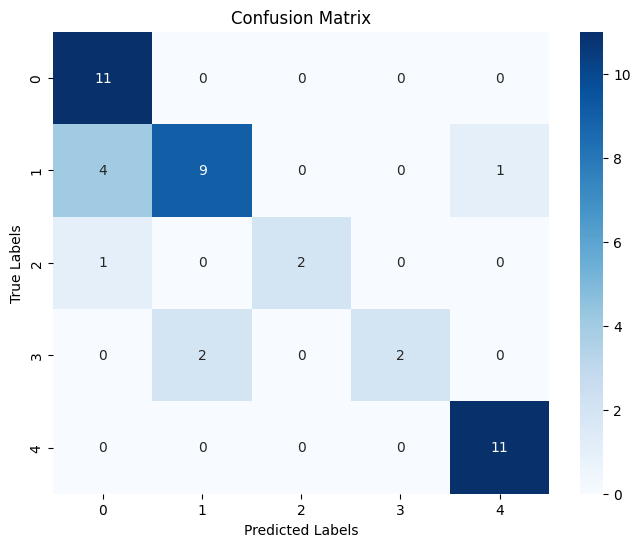

In [29]:
# Confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

>5: Bagging and Boosting Methods

In [30]:
# Bagged Decision Trees for Classification
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from sklearn.model_selection import KFold # To find subsamples
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state=42, shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 500
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=42)  # Initalizing the model
results = cross_val_score(model, X, y, cv=kfold)  # Passing data and training
print(results.mean())

0.7870129870129869


In [31]:
# AdaBoost Classification
from pandas import read_csv

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.5138528138528138


## **Final Summary:**

In this assignment, the **Glass dataset** was analyzed and modeled using the **Random Forest** algorithm and other ensemble methods such as **Bagging** and **Boosting**.

* During **Exploratory Data Analysis (EDA)**, the dataset was found to contain no missing values. Outliers were treated using the **IQR method**, and correlations between features were visualized using a **heatmap**.
* **Data preprocessing** included feature scaling with **StandardScaler** to standardize all features.
* The **Random Forest model** was implemented with 100 trees and achieved an **accuracy of 81.39%**, with good precision and recall scores, indicating strong classification performance.
* **Bagging** using Decision Trees achieved an average accuracy of **78.7%**, while **AdaBoost** gave a lower accuracy of **51.3%**.

The results show that **Bagging and Random Forest** performed significantly better than **Boosting** for this dataset. Bagging provided more stable and accurate predictions by reducing variance, whereas AdaBoost’s lower accuracy was likely due to the small number of estimators used.

Overall, the **Random Forest model** proved to be the most effective technique for this dataset, demonstrating the power of ensemble methods in improving classification performance.

## **Interview Question:**

### **1. Bagging and Boosting Methods**

* **Bagging (Bootstrap Aggregation):**
  Trains multiple models on different random subsets of the data and combines their results through majority voting or averaging.
  It reduces **variance** and prevents overfitting.
  *Example:* Random Forest.

* **Boosting:**
  Builds models **sequentially**, where each model focuses on correcting the errors of the previous one.
  It reduces **bias** and can achieve high accuracy with proper tuning.
  *Example:* AdaBoost, Gradient Boosting.

**Difference:**

| Feature     | Bagging         | Boosting    |
| :---------- | :-------------- | :---------- |
| Training    | Parallel        | Sequential  |
| Focus       | Reduce variance | Reduce bias |
| Overfitting | Less likely     | Can overfit |
| Example     | Random Forest   | AdaBoost    |

---

### **2. Handling Imbalance in Data**

* **Oversampling:** Add more samples to the minority class (e.g., SMOTE).
* **Undersampling:** Reduce samples from the majority class.
* **Class weights:** Use algorithms with `class_weight='balanced'`.
* **Better metrics:** Use Precision, Recall, F1-score, or ROC-AUC instead of just Accuracy.

**Conclusion:**
Bagging reduces variance, Boosting reduces bias, and handling data imbalance ensures fair and accurate model predictions.
